# Pre Processing Images

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import cv2
from datetime import datetime
from sklearn.utils import check_random_state
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn import svm


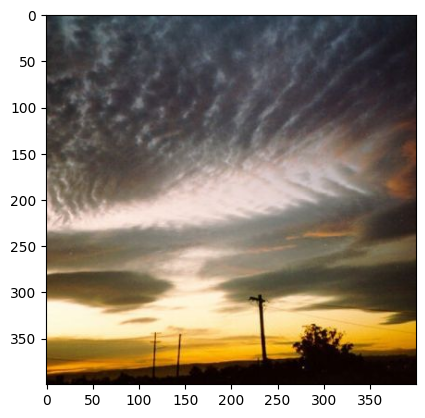

In [5]:
import os
# identifyign folders/labels
cloud_labels = os.listdir("resources/cloud-images/CCSN_v2")
# Removing the .DS_Store file - autogenerated metadata for a folder - native to macOS
if ".DS_Store" in cloud_labels: cloud_labels.remove(".DS_Store")

labeled_data = {}

for label in cloud_labels:
    cloud_images = os.listdir("resources/cloud-images/CCSN_v2/" + label)
    for image in cloud_images:
        labeled_data[image] =  [{'label': label}]

sample_image = cv2.imread("resources/cloud-images/CCSN_v2/Ac/Ac-N001.jpg")
image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [ ]:
train_images = []
train_labels = []

start_datetime = datetime.now()

for (i, image_file) in enumerate(labeled_data):
    #read image
    path = 'resources/cloud-images/CCSN_v2/'+ labeled_data[image_file][0]['label'] + '/' + image_file
    image = cv2.imread(path)
    plt.imshow(image)
    plt.show()
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    label = cloud_labels.index(labeled_data[image_file][0]['label'])
    tmp_label = labeled_data[image_file][0]['label']
    image = cv2.resize(image, (32, 32))
    train_images.append(image)
    train_labels.append(label)
    print('Loaded...', '\U0001F483', 'Image', str(i+1), 'is a', tmp_label)
    plt.imshow(image)
    plt.show()

end_datetime = datetime.now()

In [7]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

X, y = train_images,train_labels

In [ ]:
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

2543


In [9]:
print('Image Processing Duration: ' + str(end_datetime-start_datetime))

# Splitting the data

test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=None)

Image Processing Duration: 0:04:05.343371


In [10]:
svm_classifier = svm.SVC(gamma='scale')

In [ ]:
svm_classifier.fit(X_train, y_train)

In [12]:
y_pred_svm = svm_classifier.predict(X_test)

In [13]:
print("Accuracy: "+str(accuracy_score(y_test, y_pred_svm)))

Accuracy: 0.25688073394495414


In [14]:
label_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
cmx = confusion_matrix(y_test, y_pred_svm, labels=label_names)

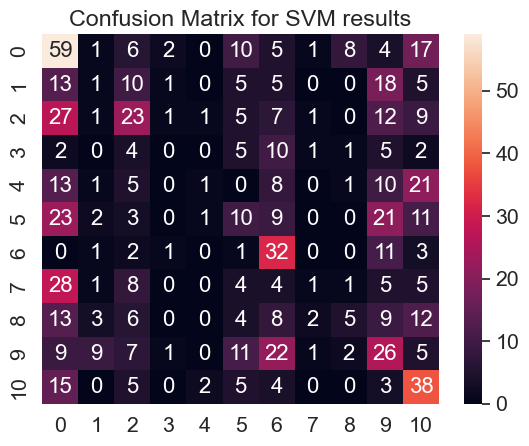

In [15]:
df_cm = pd.DataFrame(cmx)

sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
title = "Confusion Matrix for SVM results"
plt.title(title)
plt.show()

In [17]:
# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=cloud_labels))

Classification Report:
              precision    recall  f1-score   support

          Sc       0.29      0.52      0.37       113
          Ac       0.05      0.02      0.03        58
          Ns       0.29      0.26      0.28        87
          Ci       0.00      0.00      0.00        30
          Cu       0.20      0.02      0.03        60
          Cs       0.17      0.12      0.14        80
          Ct       0.28      0.63      0.39        51
          St       0.14      0.02      0.03        57
          As       0.28      0.08      0.12        62
          Cc       0.21      0.28      0.24        93
          Cb       0.30      0.53      0.38        72

    accuracy                           0.26       763
   macro avg       0.20      0.23      0.18       763
weighted avg       0.22      0.26      0.21       763



In [2]:
# # Confusion Matrix
# y_pred = svm_classifier.predict(X_test)

# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cloud_labels)
# disp.plot(cmap="Blues")
# plt.title(f"Confusion Matrix")
# plt.grid(False)
# plt.show()

NameError: name 'svm_classifier' is not defined